In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
#Load the data
data = pd.read_csv('C:/Users/felip/OneDrive - LSU AgCenter/PA_Team_Data/Raw/Sugarcane_Yield/ICPA_Prediction/training_dataset.csv')
data = data.iloc[:, 1:len(data.columns)]
data = data.drop(['id', 'Dataset'], axis=1)
#Check the data
data.head(5)



,X20180123_B,X20180123_G,X20180123_R,X20180123_NIR,Yield,X20180129_B,X20180129_G,X20180129_R,X20180129_NIR,X20180219_B,...,X20181210_R,X20181210_NIR,X20181222_B,X20181222_G,X20181222_R,X20181222_NIR,X20190104_B,X20190104_G,X20190104_R,X20190104_NIR
0,763,903,1053,1744,58.281668,716,840,1030,1594,1416,...,819,2142,664,806,955,2154,738,843,912,1837
1,773,905,1110,1649,59.303610,716,876,1084,1662,1470,...,888,2035,680,793,949,2302,839,878,956,1960
2,746,898,1094,1614,60.720816,709,876,1085,1659,1495,...,877,2085,677,805,960,2251,813,857,914,1975
3,728,899,1109,1579,61.233996,705,875,1087,1675,1523,...,870,2085,668,810,963,2239,791,853,906,1983
4,764,890,1060,1484,75.005808,700,831,1022,1546,1258,...,874,2104,673,827,1000,2205,763,867,924,1911


In [3]:
#Present the shape of the data
print('The shape of our features is:', data.shape)

The shape of our features is: (6931, 161)


In [4]:
data_feat = pd.get_dummies(data)

#Extract the values to be predicted
y_data = np.array(data_feat['Yield'])

#Delete the values to be predicted from the original data frame
X_data = data_feat.drop('Yield', axis = 1)

In [5]:
# Saving feature names for later use
variable_list = list(X_data.columns)

# Convert to numpy array
X_data = np.array(X_data)

In [6]:
# Split the data into training and testing sets
train_data, train_labels= X_data, y_data

print('Training Features Shape:', train_data.shape)
print('Training Labels Shape:', train_labels.shape)

Training Features Shape: (6931, 160)
Training Labels Shape: (6931,)


In [7]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 2500, random_state = 50)

# Train the model on training data
rf.fit(train_data, train_labels);

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.148825 to fit



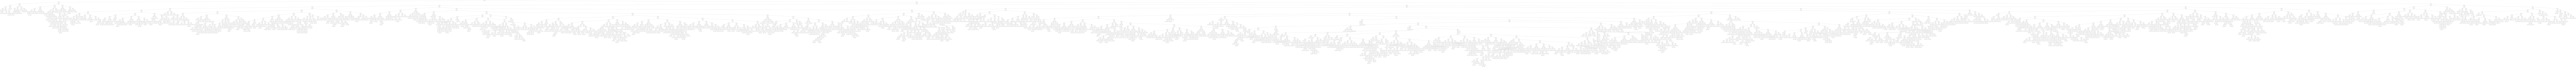

In [34]:
from sklearn.tree import export_graphviz
from IPython import display
import six

dotfile = six.StringIO()
i_tree = 0
for tree_in_forest in rf.estimators_:
    if (i_tree ==3):        
        tree.export_graphviz(tree_in_forest, out_file=dotfile)
        graph = pydotplus.graph_from_dot_data(dotfile.getvalue())        
    i_tree = i_tree + 1
graph.write_png("C:/Users/felip/tree.png")

In [35]:
graph.write_png("C:/Users/felip/tree.png")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.148825 to fit



True

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(data, round(importance, 2)) for data , importance in zip(variable_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [ ]:
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, variable_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

plt.savefig('C:/Users/felip/OneDrive - LSU AgCenter/PA_Team_Data/Raw/Sugarcane_Yield/ASA_Yield_Prediction/Variable_Importances.png', bbox_inches="tight", dpi = 300)

In [ ]:
#Open the dataset created for prediction
real_test = pd.read_csv('C:/Users/felip/OneDrive - LSU AgCenter/PA_Team_Data/Raw/Sugarcane_Yield/ICPA_Prediction/pred_dataset.csv ')

In [ ]:
real_test_crop = real_test.iloc[:, 1:len(real_test.columns)]
real_test_crop = real_test_crop.drop(['id', 'Dataset', 'Yield'], axis=1)
real_test_np = np.array(pd.get_dummies(real_test_crop))
test_data = real_test_np
print('Test Features Shape:', test_data.shape)

In [ ]:
real_test_crop

In [ ]:
#Predicts based on the RF
predictions = rf.predict(real_test_np)

In [ ]:
#Add the results in the original data
y_pred = pd.DataFrame(predictions.tolist())
real_test['y_pred'] = y_pred
#confusion_matrix = ConfusionMatrix(y_test_label, y_pred_label)

In [ ]:
#Save the data
real_test.to_csv('C:/Users/felip/OneDrive - LSU AgCenter/PA_Team_Data/Raw/Sugarcane_Yield/ICPA_Prediction/Results.csv', sep=',', encoding='utf-8')